In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font',family='serif',size='16')
fig = plt.figure(1,figsize=(7,5))
#fig = plt.figure(1,figsize=(7, 5)) ## To save figure.

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)   

<Figure size 504x360 with 0 Axes>

In [2]:
np.random.seed(0)
def compute_reciprocals(values): 
    output = np.empty(len(values)) 
    for i in range(len(values)):
        output[i] = 1.0 / values[i] 
    return output
           
    
values = np.random.randint(1, 10, size=5)
compute_reciprocals(values)



array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

In [3]:
big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

KeyboardInterrupt: 

In [5]:
%timeit (1.0 / big_array)

13.9 ms ± 1.76 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
import numba as nb

@nb.jit(nopython=True)
def compute_reciprocals2(values): 
    output = np.empty(len(values)) 
    for i in range(len(values)):
        output[i] = 1.0 / values[i] 
    return output
           
%timeit compute_reciprocals2(big_array)

The slowest run took 6.35 times longer than the fastest. This could mean that an intermediate result is being cached.
25 ms ± 18.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
print(np.arange(5))
print(np.arange(1,6))
np.arange(5) / np.arange(1, 6)


In [9]:
x = np.arange(9).reshape((3, 3)) ## Homework: reshape 的用法，自己尝试一些！
print(x)
2**x

[[0 1 2]
 [3 4 5]
 [6 7 8]]


array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]])

In [8]:
x = np.arange(5) 
print("x =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2) ### ???

x = [0 1 2 3 4]
x + 5 = [5 6 7 8 9]
x - 5 = [-5 -4 -3 -2 -1]
x * 2 = [0 2 4 6 8]
x / 2 = [0.  0.5 1.  1.5 2. ]
x // 2 = [0 0 1 1 2]


In [10]:
print("-x = ", -x) 
print("x ** 2 = ", x ** 2)
print("x % 2 = ", x % 2)


-x =  [[ 0 -1 -2]
 [-3 -4 -5]
 [-6 -7 -8]]
x ** 2 =  [[ 0  1  4]
 [ 9 16 25]
 [36 49 64]]
x % 2 =  [[0 1 0]
 [1 0 1]
 [0 1 0]]


In [11]:
-(0.5*x + 1) ** 2

array([[ -1.  ,  -2.25,  -4.  ],
       [ -6.25,  -9.  , -12.25],
       [-16.  , -20.25, -25.  ]])

In [12]:
print(np.add(x, 2))
print(np.subtract(x,2))
print(np.multiply(x,2))
print(np.divide(x,2))

[[ 2  3  4]
 [ 5  6  7]
 [ 8  9 10]]
[[-2 -1  0]
 [ 1  2  3]
 [ 4  5  6]]
[[ 0  2  4]
 [ 6  8 10]
 [12 14 16]]
[[0.  0.5 1. ]
 [1.5 2.  2.5]
 [3.  3.5 4. ]]


In [13]:
print(abs(x))
print(np.abs(x))

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [14]:
print("sin(theta) = ", np.sin(x)) 
print("cos(theta) = ", np.cos(x)) 
print("tan(theta) = ", np.tan(x))
print(np.sin(np.pi))

sin(theta) =  [[ 0.          0.84147098  0.90929743]
 [ 0.14112001 -0.7568025  -0.95892427]
 [-0.2794155   0.6569866   0.98935825]]
cos(theta) =  [[ 1.          0.54030231 -0.41614684]
 [-0.9899925  -0.65364362  0.28366219]
 [ 0.96017029  0.75390225 -0.14550003]]
tan(theta) =  [[ 0.          1.55740772 -2.18503986]
 [-0.14254654  1.15782128 -3.38051501]
 [-0.29100619  0.87144798 -6.79971146]]
1.2246467991473532e-16


$e^{A}\equiv \mathbb{I} + A + \frac{1}{2!}A^2 + \cdots$

In [15]:
print(x)
y = np.random.random(5)*2-1.0
print(y)
print("arcsin(x) = ", np.arcsin(y)) 
print("arccos(x) = ", np.arccos(y)) 
print("arctan(x) = ", np.arctan(y))

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[-0.49517979  0.95144915 -0.7604736  -0.58286224 -0.52033749]
arcsin(x) =  [-0.51804176  1.25791015 -0.86404213 -0.62224671 -0.54724611]
arccos(x) =  [2.08883809 0.31288617 2.43483846 2.19304304 2.11804243]
arctan(x) =  [-0.45978401  0.76052391 -0.65017059 -0.52772289 -0.47978491]


In [16]:
print("x =", x)
print("e^x =",np.exp(x)) 
print("2^x =",np.exp2(x)) 
print("3^x =",np.power(3,x))
print("2.3^x = ",np.power(2.3,x))
## Homework: y^x, y and x both are float?


x = [[0 1 2]
 [3 4 5]
 [6 7 8]]
e^x = [[1.00000000e+00 2.71828183e+00 7.38905610e+00]
 [2.00855369e+01 5.45981500e+01 1.48413159e+02]
 [4.03428793e+02 1.09663316e+03 2.98095799e+03]]
2^x = [[  1.   2.   4.]
 [  8.  16.  32.]
 [ 64. 128. 256.]]
3^x = [[   1    3    9]
 [  27   81  243]
 [ 729 2187 6561]]
2.3^x =  [[  1.           2.3          5.29      ]
 [ 12.167       27.9841      64.36343   ]
 [148.035889   340.4825447  783.10985281]]


In [17]:
print("x =", x)
y = x + 0.2
print("ln(x) =", np.log(y)) 
print("log2(x) =", np.log2(y)) 
print("log10(x) =", np.log10(y))
## Homework: log_{3}(x) ?


x = [[0 1 2]
 [3 4 5]
 [6 7 8]]
ln(x) = [[-1.60943791  0.18232156  0.78845736]
 [ 1.16315081  1.43508453  1.64865863]
 [ 1.82454929  1.97408103  2.10413415]]
log2(x) = [[-2.32192809  0.26303441  1.13750352]
 [ 1.67807191  2.07038933  2.37851162]
 [ 2.63226822  2.84799691  3.03562391]]
log10(x) = [[-0.69897     0.07918125  0.34242268]
 [ 0.50514998  0.62324929  0.71600334]
 [ 0.79239169  0.8573325   0.91381385]]


In [19]:
print("x =", x)
print("exp(x) - 1 =", np.expm1(x)) ## What's this??
print("log(1 + x) =", np.log1p(x)) ## What's this??

x = [[0 1 2]
 [3 4 5]
 [6 7 8]]
exp(x) - 1 = [[0.00000000e+00 1.71828183e+00 6.38905610e+00]
 [1.90855369e+01 5.35981500e+01 1.47413159e+02]
 [4.02428793e+02 1.09563316e+03 2.97995799e+03]]
log(1 + x) = [[0.         0.69314718 1.09861229]
 [1.38629436 1.60943791 1.79175947]
 [1.94591015 2.07944154 2.19722458]]


In [20]:
from scipy import special
x=[1,5,10]
print("gamma(x) =", special.gamma(x)) 
print("ln|gamma(x)| =", special.gammaln(x)) 
print("beta(x, 2) =", special.beta(x, 2))
x = np.array([0, 0.3, 0.7, 1.0]) 
print("erf(x) =", special.erf(x)) 
print("erfc(x) =", special.erfc(x)) 
print("erfinv(x) =", special.erfinv(x))

gamma(x) = [1.0000e+00 2.4000e+01 3.6288e+05]
ln|gamma(x)| = [ 0.          3.17805383 12.80182748]
beta(x, 2) = [0.5        0.03333333 0.00909091]
erf(x) = [0.         0.32862676 0.67780119 0.84270079]
erfc(x) = [1.         0.67137324 0.32219881 0.15729921]
erfinv(x) = [0.         0.27246271 0.73286908        inf]


In [22]:
x = np.arange(5)
y = np.empty(5) ## ??
print("x: ",x)
print("y: ", y)
print(np.multiply(x,10))
np.multiply(x, 10, out=y) 
print("y: ", y)


x:  [0 1 2 3 4]
y:  [0.0e+000 4.9e-324 9.9e-324 1.5e-323 2.0e-323]
[ 0 10 20 30 40]
y:  [ 0. 10. 20. 30. 40.]


In [23]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

586 ms ± 95.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.5 ms ± 617 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
print(min(big_array))
print(max(big_array))

In [ ]:
%timeit min(big_array)
%timeit np.min(big_array)

In [ ]:
M = np.random.random((3, 4)) 
print(M)

In [ ]:
M.sum()

In [ ]:
N = np.matrix([[1,2],[3,4]])
print(N)

In [ ]:
N.sum()

In [ ]:
N.min()

In [ ]:
N.min(axis=0)

In [ ]:
NN = np.matrix([[1,3,5],[4,2,4]])
NN.min(axis=0)

In [ ]:
NN.min(axis=1)

In [ ]:
import numba as nb

@nb.jit(nopython=True)
def compute_reciprocals(values): 
    output = np.empty(len(values)) 
    for i in range(len(values)):
        output[i] = 1.0 / values[i] 
    return output
           
%timeit compute_reciprocals(big_array)

In [ ]:
%timeit 1.0/big_array

# Comprehensive practice

In [26]:
X = np.random.random((10, 3))
print(np.shape(X))
Xmean = X.mean(0)
print(Xmean)

(10, 3)
[0.35309906 0.38216498 0.43610695]


In [27]:
X_centered = X - Xmean ## Homework: principle of this operation??

In [28]:
print(X_centered)

[[-0.01878078  0.43495157 -0.3855792 ]
 [-0.28994454 -0.28472385 -0.34365905]
 [-0.25110363  0.13091462  0.00686015]
 [ 0.02509257  0.03037836  0.53096346]
 [ 0.43083979 -0.12740205  0.03751277]
 [ 0.14909435 -0.02133968  0.35576067]
 [-0.03956715 -0.23443543 -0.35151787]
 [ 0.23895553  0.0771811  -0.32886301]
 [ 0.00465037 -0.09790898  0.55514955]
 [-0.24923652  0.09238433 -0.07662748]]


In [29]:
X_centered.mean(0)

array([4.44089210e-17, 3.33066907e-17, 2.22044605e-17])

## Example: heights of american presidents

In [30]:
!head -4 "./PythonData/data/president_heights.csv"



order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


In [31]:
import pandas as pd ## 
data = pd.read_csv('./PythonData/data/president_heights.csv') 
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [32]:
print("Mean height: ", heights.mean()) 
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:  179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193


In [33]:
print("25th percentile: ", np.percentile(heights, 25))
print("Median:          ", np.median(heights))
print("75th percentile: ", np.percentile(heights, 75))

25th percentile:  174.25
Median:           182.0
75th percentile:  183.0


In [34]:
import seaborn; seaborn.set() # set plot style



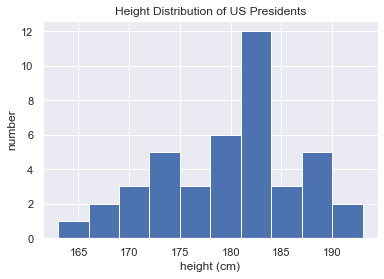

In [35]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

# 广播（Broadcasting）

In [ ]:
# x and y have 50 steps from 0 to 5 
x = np.linspace(0, 5, 50)
print('x: ',x)
y = np.linspace(0, 5, 50)[:, np.newaxis] ## Homework: what is newaxis??
print('y: ',y)

In [ ]:
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)
## Homework: why z is (50,50) 'matrix'?

In [ ]:
print(np.shape(z))

In [ ]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],
                       cmap='viridis')
plt.colorbar();

## Example: counting of the rainy days



In [36]:
import pandas as pd
# use Pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('./PythonData/data/Seattle2014.csv')['PRCP'].values 
inches = rainfall / 254 # 1/10mm -> inches
inches.shape

(365,)

In [4]:
import seaborn; seaborn.set() # set plot styles

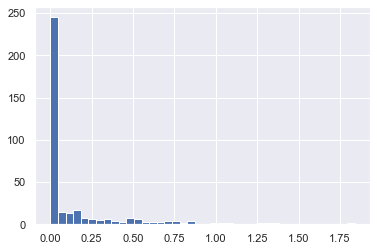

In [37]:
plt.hist(inches, 40);